# Clustering The 20 newsgroups text dataset

- Step 1:Preprocessing text
- Step 2: Vectorization
- Step 3: Topic modeling
- Step 4: Clustering

In [9]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [10]:
dataset.filenames.shape

(11314,)

In [11]:
set(dataset.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [12]:
documents[10]

'Archive-name: graphics/resources-list/part1\nLast-modified: 1993/04/17\n\n\nComputer Graphics Resource Listing : WEEKLY POSTING [ PART 1/3 ]\n===================================================\nLast Change : 17 April 1993\n\nMany FAQs, including this Listing, are available on the archive site\npit-manager.mit.edu (alias rtfm.mit.edu) [18.172.1.27] in the directory\npub/usenet/news.answers.  The name under which a FAQ is archived appears\nin the Archive-name line at the top of the article.\nThis FAQ is archived as graphics/resources-list/part[1-3]\n\nThere\'s a mail server on that machine. You send a e-mail message to\nmail-server@pit-manager.mit.edu  containing the keyword "help" (without\nquotes!) in the message body.\n\nYou can see in many other places for this Listing. See the item:\n\n0. Places to find the Resource Listing\n\nfor more information.\n\nItems Changed:\n--------------\n\nRE-ARRANGED the subjects, in order to fir better in the 63K/article limit.\nI PLAN ON CHANGING HE

# Preprocessing Text
The first step to do any modeling is to clean the data.

This involves removing punctuation,stop words and if the data is in html format we can do more things like removing html,css,script content using BeautifulSoup. For the 20 newsgroups dataset scikit learn provides a remove argument which can be used to clean the text such as removing headers,footers and quotes.

When evaluating text classifiers on the 20 Newsgroups data, you should strip newsgroup-related metadata. In scikit-learn, you can do this by setting remove=(‘headers’, ‘footers’, ‘quotes’) which we did in the previous step when importing the data.

# Vectorization
In order to feed predictive or clustering models with the text data, one first need to turn the text into vectors of numerical values suitable for statistical analysis.This is called as a document term matrix. This can be done in two ways.

Using TFIDF Vectorizer(Which I had explained in an earlier post)
Count Vectorizer + Calculating Rates on top of this instead of just counts.
(Using rates rather than counts will allow us to account for differences in the length of the documents. Accounting for differences in document lengths when dealing with word counts is essential. For example, a text using “whence” ten times in a 1,000 word article uses the word at a rate of 10 per 1,000 words, while a 100,000 word novel that uses “whence” 20 times uses it at a rate of 0.2 per 1,000 words. While the word occurs more in absolute terms in the second text, the rate is higher in the first text. While there are other ways to account for document length—a procedure called “normalization”—considering the rate per 1,000 words will serve us well. An appealing feature of word rates per 1,000 words is that readers are familiar with documents of this length (e.g., a newspaper article).)

In [13]:
# TFIDF Vectorizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

vectors = tfidf_vectorizer.fit_transform(documents)

vectors.shape

(11314, 39115)

In [14]:
# count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,stop_words='english')

tf = tf_vectorizer.fit_transform(documents)

tf.shape

(11314, 39115)

In [19]:
# convert this to a normal numpy array
dtm = tf.toarray()
# normalize counts to rates per 50 words
rates = 50 * dtm / np.sum(dtm, axis=1, keepdims=True)

# This fills the missing values with zero
rates[np.isnan(rates)] = 0

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


# Topic modeling
We could compare documents using something simple as euclidean distance, cosine similarity or more complex models like LDA

## Euclidean Distance:
The Euclidean distance between two vectors in the plane should be familiar from geometry, as it is the length of the hypotenuse that joins the two vectors. For instance, consider the Euclidean distance between the vectors x→=(1,3) and y→=(4,2). The distance between the two vectors is √(1−4)2+(3−2)2=√10. This two dimension thing can be extended to an arbitrary number of dimensions.Since two documents in our corpus now have an expression as vectors, we can calculate the Euclidean distance between them.

In [16]:
from sklearn.metrics.pairwise import euclidean_distances

dist = euclidean_distances(rates)
np.round(dist,1)

array([[ 0. , 11. , 10.9, ..., 16.7, 16.1,  9.2],
       [11. ,  0. , 12. , ..., 16.7, 16.7, 10. ],
       [10.9, 12. ,  0. , ..., 16.9, 16.9, 10.3],
       ...,
       [16.7, 16.7, 16.9, ...,  0. , 20.9, 15.9],
       [16.1, 16.7, 16.9, ..., 20.9,  0. , 15.1],
       [ 9.2, 10. , 10.3, ..., 15.9, 15.1,  0. ]])

In [17]:
# the distance between the first and third document can be calculated as
dist[1,3]

# the distance between the third and fifth document can be calculated as 
dist[3,5]

12.61680123761121

Which shows the third and fifth documents have less similarity as compared to the first and third documents.

# Cosine Similarity
If we want to use a measure of distance that takes into consideration the length of the novels, we could use cosine similarity.This uses the judgement of orientation for similarity between two vector spaces.Two vectors with the same orientation have a cosine similarity of 1, two vectors at 90° have a similarity of 0, and two vectors diametrically opposed have a similarity of -1, independent of their magnitude.

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

dist = cosine_similarity(rates)

dist[1,3]


dist[3,5]

0.025993762245501817

# Clustering

# Display Workflow of data

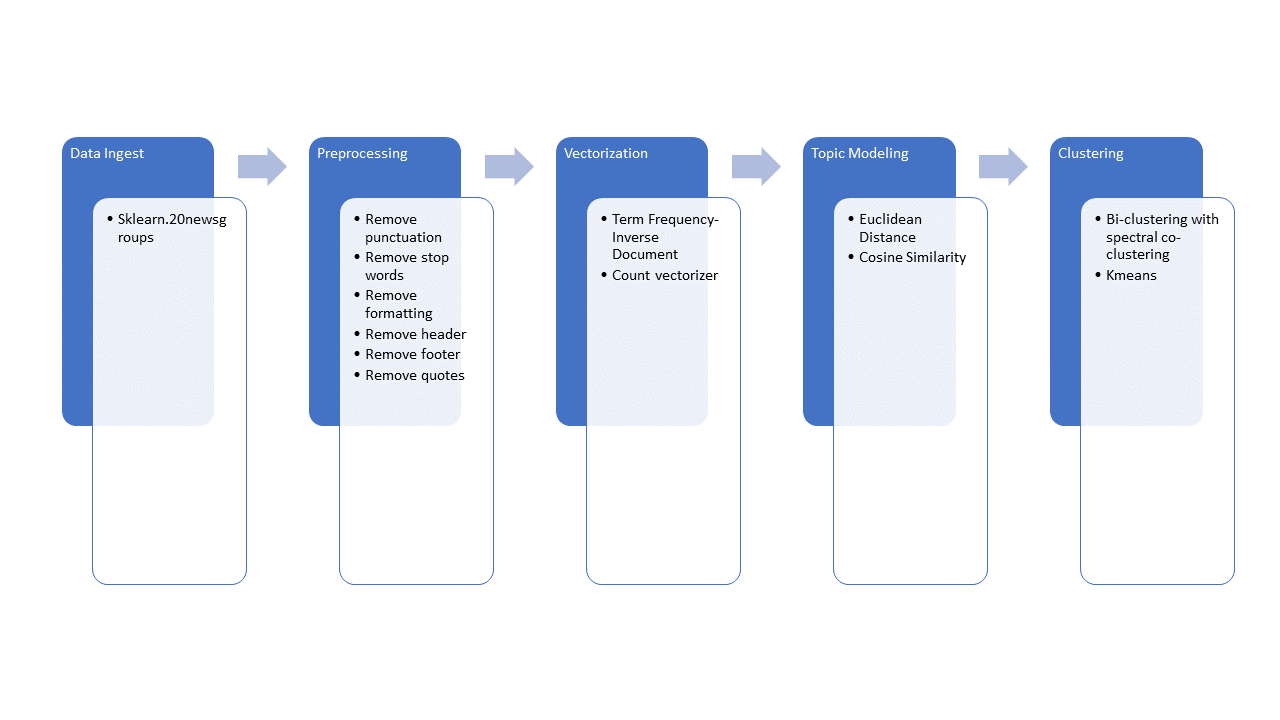

In [22]:
from IPython.display import Image
Image(filename='input/workflow.png')

## Imports

In [13]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from collections import defaultdict
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics.cluster import v_measure_score

import logging
from optparse import OptionParser
import sys
from time import time
import numpy as np
import operator
from time import time
import numpy as np
print(__doc__)

Automatically created module for IPython interactive environment


# Biclustering documents with the Spectral Co-clustering algorithm


This example demonstrates the Spectral Co-clustering algorithm on the
twenty newsgroups dataset. The 'comp.os.ms-windows.misc' category is
excluded because it contains many posts containing nothing but data.

The TF-IDF vectorized posts form a word frequency matrix, which is
then biclustered using Dhillon's Spectral Co-Clustering algorithm. The
resulting document-word biclusters indicate subsets words used more
often in those subsets documents.

For a few of the best biclusters, its most common document categories
and its ten most important words get printed. The best biclusters are
determined by their normalized cut. The best words are determined by
comparing their sums inside and outside the bicluster.

For comparison, the documents are also clustered using
MiniBatchKMeans. The document clusters derived from the biclusters
achieve a better V-measure than clusters found by MiniBatchKMeans.



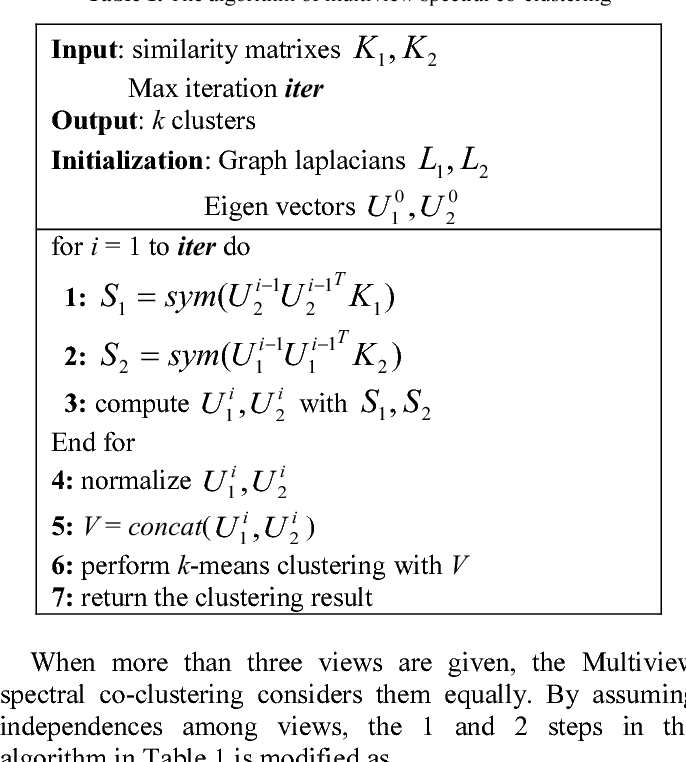

In [14]:
from IPython.display import Image
Image(filename='input/spectral.png')

In [15]:
def number_normalizer(tokens):
    """ Map all numeric tokens to a placeholder.

    For many applications, tokens that begin with a number are not directly
    useful, but the fact that such a token exists can be relevant.  By applying
    this form of dimensionality reduction, some methods may perform better.
    """
    return ("#NUMBER" if token[0].isdigit() else token for token in tokens)


class NumberNormalizingVectorizer(TfidfVectorizer):
    def build_tokenizer(self):
        tokenize = super().build_tokenizer()
        return lambda doc: list(number_normalizer(tokenize(doc)))


In [16]:
# exclude 'comp.os.ms-windows.misc'
categories = ['alt.atheism', 'comp.graphics',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'comp.windows.x', 'misc.forsale', 'rec.autos',
              'rec.motorcycles', 'rec.sport.baseball',
              'rec.sport.hockey', 'sci.crypt', 'sci.electronics',
              'sci.med', 'sci.space', 'soc.religion.christian',
              'talk.politics.guns', 'talk.politics.mideast',
              'talk.politics.misc', 'talk.religion.misc']
newsgroups = fetch_20newsgroups(categories=categories)
y_true = newsgroups.target

vectorizer = NumberNormalizingVectorizer(stop_words='english', min_df=5)
cocluster = SpectralCoclustering(n_clusters=len(categories),
                                 svd_method='arpack', random_state=0)
kmeans = MiniBatchKMeans(n_clusters=len(categories), batch_size=20000,
                         random_state=0)

print("Vectorizing...")
X = vectorizer.fit_transform(newsgroups.data)

print("Coclustering...")
start_time = time()
cocluster.fit(X)
y_cocluster = cocluster.row_labels_
print("Done in {:.2f}s. V-measure: {:.4f}".format(
    time() - start_time,
    v_measure_score(y_cocluster, y_true)))

print("MiniBatchKMeans...")
start_time = time()
y_kmeans = kmeans.fit_predict(X)
print("Done in {:.2f}s. V-measure: {:.4f}".format(
    time() - start_time,
    v_measure_score(y_kmeans, y_true)))

feature_names = vectorizer.get_feature_names()
document_names = list(newsgroups.target_names[i] for i in newsgroups.target)

Vectorizing...
Coclustering...
Done in 7.39s. V-measure: 0.4435
MiniBatchKMeans...
Done in 14.53s. V-measure: 0.3344


In [17]:
def bicluster_ncut(i):
    rows, cols = cocluster.get_indices(i)
    if not (np.any(rows) and np.any(cols)):
        import sys
        return sys.float_info.max
    row_complement = np.nonzero(np.logical_not(cocluster.rows_[i]))[0]
    col_complement = np.nonzero(np.logical_not(cocluster.columns_[i]))[0]
    # Note: the following is identical to X[rows[:, np.newaxis],
    # cols].sum() but much faster in scipy <= 0.16
    weight = X[rows][:, cols].sum()
    cut = (X[row_complement][:, cols].sum() +
           X[rows][:, col_complement].sum())
    return cut / weight


def most_common(d):
    """Items of a defaultdict(int) with the highest values.

    Like Counter.most_common in Python >=2.7.
    """
    return sorted(d.items(), key=operator.itemgetter(1), reverse=True)

In [18]:
bicluster_ncuts = list(bicluster_ncut(i)
                       for i in range(len(newsgroups.target_names)))
best_idx = np.argsort(bicluster_ncuts)[:5]

print()
print("Best biclusters:")
print("----------------")
for idx, cluster in enumerate(best_idx):
    n_rows, n_cols = cocluster.get_shape(cluster)
    cluster_docs, cluster_words = cocluster.get_indices(cluster)
    if not len(cluster_docs) or not len(cluster_words):
        continue

    # categories
    counter = defaultdict(int)
    for i in cluster_docs:
        counter[document_names[i]] += 1
    cat_string = ", ".join("{:.0f}% {}".format(float(c) / n_rows * 100, name)
                           for name, c in most_common(counter)[:3])

    # words
    out_of_cluster_docs = cocluster.row_labels_ != cluster
    out_of_cluster_docs = np.where(out_of_cluster_docs)[0]
    word_col = X[:, cluster_words]
    word_scores = np.array(word_col[cluster_docs, :].sum(axis=0) -
                           word_col[out_of_cluster_docs, :].sum(axis=0))
    word_scores = word_scores.ravel()
    important_words = list(feature_names[cluster_words[i]]
                           for i in word_scores.argsort()[:-11:-1])

    print("bicluster {} : {} documents, {} words".format(
        idx, n_rows, n_cols))
    print("categories   : {}".format(cat_string))
    print("words        : {}\n".format(', '.join(important_words)))


Best biclusters:
----------------
bicluster 0 : 1957 documents, 4363 words
categories   : 23% talk.politics.guns, 18% talk.politics.misc, 17% sci.med
words        : gun, guns, geb, banks, gordon, clinton, pitt, cdt, surrender, veal

bicluster 1 : 1263 documents, 3551 words
categories   : 27% soc.religion.christian, 25% talk.politics.mideast, 24% alt.atheism
words        : god, jesus, christians, sin, objective, kent, belief, christ, faith, moral

bicluster 2 : 2212 documents, 2774 words
categories   : 18% comp.sys.mac.hardware, 17% comp.sys.ibm.pc.hardware, 15% comp.graphics
words        : voltage, board, dsp, stereo, receiver, packages, shipping, circuit, package, compression

bicluster 3 : 1774 documents, 2629 words
categories   : 27% rec.motorcycles, 23% rec.autos, 13% misc.forsale
words        : bike, car, dod, engine, motorcycle, ride, honda, bikes, helmet, bmw

bicluster 4 : 200 documents, 1167 words
categories   : 81% talk.politics.mideast, 10% alt.atheism, 8% soc.religion.chri


# Clustering text documents using k-means


This is an example showing how the scikit-learn can be used to cluster
documents by topics using a bag-of-words approach. This example uses
a scipy.sparse matrix to store the features instead of standard numpy arrays.

Two feature extraction methods can be used in this example:

  - TfidfVectorizer uses a in-memory vocabulary (a python dict) to map the most
    frequent words to features indices and hence compute a word occurrence
    frequency (sparse) matrix. The word frequencies are then reweighted using
    the Inverse Document Frequency (IDF) vector collected feature-wise over
    the corpus.

  - HashingVectorizer hashes word occurrences to a fixed dimensional space,
    possibly with collisions. The word count vectors are then normalized to
    each have l2-norm equal to one (projected to the euclidean unit-ball) which
    seems to be important for k-means to work in high dimensional space.

    HashingVectorizer does not provide IDF weighting as this is a stateless
    model (the fit method does nothing). When IDF weighting is needed it can
    be added by pipelining its output to a TfidfTransformer instance.

Two algorithms are demoed: ordinary k-means and its more scalable cousin
minibatch k-means.

Additionally, latent semantic analysis can also be used to reduce
dimensionality and discover latent patterns in the data.

It can be noted that k-means (and minibatch k-means) are very sensitive to
feature scaling and that in this case the IDF weighting helps improve the
quality of the clustering by quite a lot as measured against the "ground truth"
provided by the class label assignments of the 20 newsgroups dataset.

This improvement is not visible in the Silhouette Coefficient which is small
for both as this measure seem to suffer from the phenomenon called
"Concentration of Measure" or "Curse of Dimensionality" for high dimensional
datasets such as text data. Other measures such as V-measure and Adjusted Rand
Index are information theoretic based evaluation scores: as they are only based
on cluster assignments rather than distances, hence not affected by the curse
of dimensionality.

Note: as k-means is optimizing a non-convex objective function, it will likely
end up in a local optimum. Several runs with independent random init might be
necessary to get a good convergence.




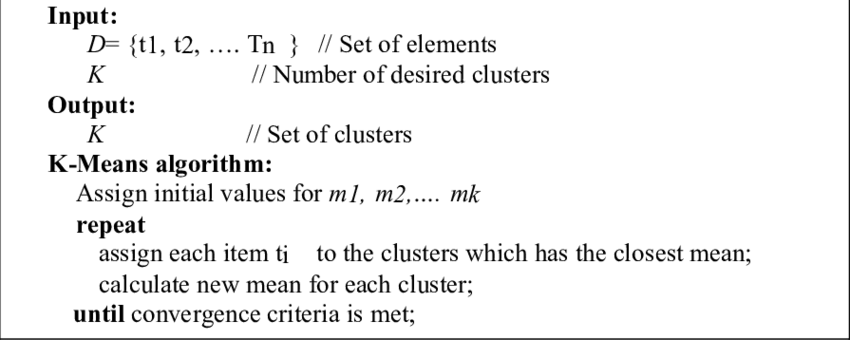

In [19]:
Image(filename='input/kmeans.png')

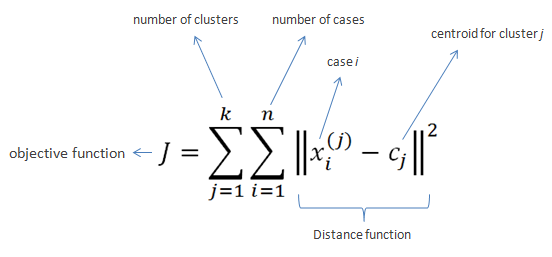

In [20]:
Image(filename='input/clustering_kmeans_c.png')

In [21]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

# parse commandline arguments
op = OptionParser()
op.add_option("--lsa",
              dest="n_components", type="int",
              help="Preprocess documents with latent semantic analysis.")
op.add_option("--no-minibatch",
              action="store_false", dest="minibatch", default=True,
              help="Use ordinary k-means algorithm (in batch mode).")
op.add_option("--no-idf",
              action="store_false", dest="use_idf", default=True,
              help="Disable Inverse Document Frequency feature weighting.")
op.add_option("--use-hashing",
              action="store_true", default=False,
              help="Use a hashing feature vectorizer")
op.add_option("--n-features", type=int, default=10000,
              help="Maximum number of features (dimensions)"
                   " to extract from text.")
op.add_option("--verbose",
              action="store_true", dest="verbose", default=False,
              help="Print progress reports inside k-means algorithm.")

print(__doc__)
op.print_help()


def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')


# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)


# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset "
      "using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=opts.n_features,
                                   stop_words='english', alternate_sign=False,
                                   norm=None, binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=opts.n_features,
                                       stop_words='english',
                                       alternate_sign=False, norm='l2',
                                       binary=False)
else:
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=opts.n_features,
                                 min_df=2, stop_words='english',
                                 use_idf=opts.use_idf)
X = vectorizer.fit_transform(dataset.data)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

if opts.n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(opts.n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()


# #############################################################################
# Do the actual clustering

if opts.minibatch:
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=opts.verbose)
else:
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=opts.verbose)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()


if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --lsa=N_COMPONENTS    Preprocess documents with latent semantic analysis.
  --no-minibatch        Use ordinary k-means algorithm (in batch mode).
  --no-idf              Disable Inverse Document Frequency feature weighting.
  --use-hashing         Use a hashing feature vectorizer
  --n-features=N_FEATURES
                        Maximum number of features (dimensions) to extract
                        from text.
  --verbose             Print progress reports inside k-means algorithm.
Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories

Extracting features from the training dataset using a sparse vectorizer
done in 1.732025s
n_samples: 3387, n_features: 10000

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_